# Search tomato & potato

## Initialization

In [1]:
import orthologs
from IPython.display import Image,SVG
search = orthologs.SEARCH("http://pbg-ld.candygene-nlesc.surf-hosted.nl:8890/sparql")

## Potato
### Find interval
Find locations for genes, and compute interval

In [2]:
pg1 = "PGSC0003DMG400006678"
pg2 = "PGSC0003DMG400020801"
intervalP = search.compute_interval(pg1, pg2)

,location
gene_id,
PGSC0003DMG400006678,chromosome 10:48978066-48982521
PGSC0003DMG400020801,chromosome 10:49258672-49260078


### Find genes and orthologs
Find genes and orthologs for interval

In [3]:
genesP = search.interval_genes(intervalP)
aggregations = {"ensembl_gene_id" : ["nunique"], "ortholog_gene_id" : ["nunique"]}
display(genesP.groupby(["gene_id"]).agg(aggregations))


,ensembl_gene_id,ortholog_gene_id
,nunique,nunique
gene_id,,
PGSC0003DMG400006679,1,0
PGSC0003DMG400006680,1,0
PGSC0003DMG400006681,1,0
PGSC0003DMG400020795,1,0
PGSC0003DMG400020797,0,0
PGSC0003DMG400020798,1,2
PGSC0003DMG400020799,1,2
PGSC0003DMG400020800,1,2


### Create diagram
Create a diagram for the genes found in the interval

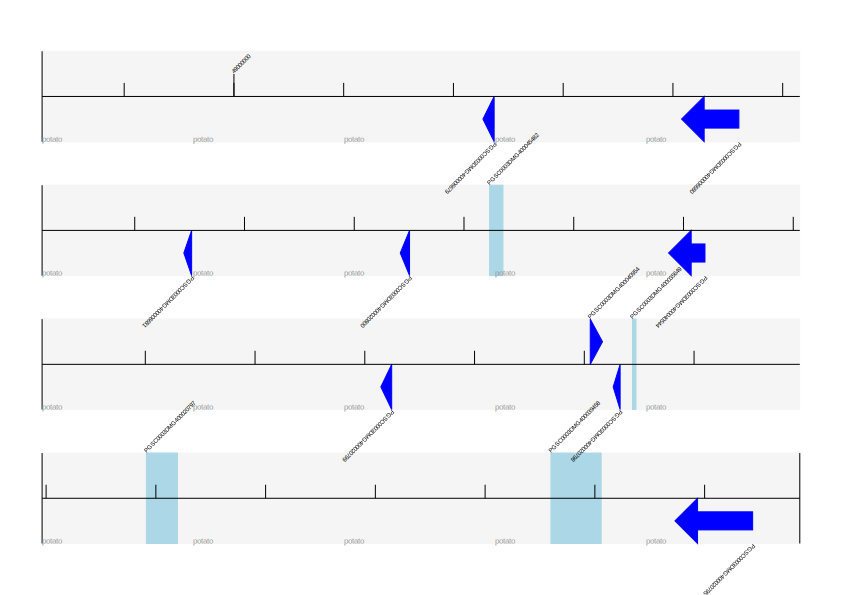

In [4]:
genesPdiagram = search.diagram_genes("potato", intervalP, genesP)
tmpFilename = "potato_"+pg1+"-"+pg2+".svg"
genesPdiagram.write(tmpFilename, "svg")
SVG(tmpFilename)

### List orthologs
List orthologs for the genes found in the interval

In [5]:
display(genesP[["location","ensembl_gene_id","ortholog_gene_id","ortholog_location"]])

,location,ensembl_gene_id,ortholog_gene_id,ortholog_location
gene_id,,,,
PGSC0003DMG400006679,chromosome 10:49022687-49023709,PGSC0003DMG400006679,None,None
PGSC0003DMG400006680,chromosome 10:49040786-49046010,PGSC0003DMG400006680,None,None
PGSC0003DMG400006681,chromosome 10:49064472-49065184,PGSC0003DMG400006681,None,None
PGSC0003DMG400020800,chromosome 10:49084193-49085040,PGSC0003DMG400020800,Solyc10g076210.1,chromosome 10:59054478-59055612:-1
PGSC0003DMG400020800,chromosome 10:49084193-49085040,PGSC0003DMG400020800,Solyc10g076220.1,chromosome 10:59059828-59060961:-1
PGSC0003DMG400020800,chromosome 10:49084193-49085040,PGSC0003DMG400020800,None,None
PGSC0003DMG400045482,chromosome 10:49092329-49093552,None,None,None
PGSC0003DMG400040544,chromosome 10:49108641-49111957,PGSC0003DMG400040544,Solyc01g066890.1,chromosome 1:75142075-75142941:-1
PGSC0003DMG400040544,chromosome 10:49108641-49111957,PGSC0003DMG400040544,Solyc07g041360.1,chromosome 7:52534390-52534818:-1


### Chromosomes for orthologs
Chromosomes containing the found orthologs

In [6]:
aggregations = {"ortholog_begin_pos" : ["min","max"], "ortholog_end_pos" : ["min","max"]}
display(genesP.groupby(["ortholog_begin_ref"]).agg(aggregations))

ortholog_begin_pos  \
                                                                  min   
ortholog_begin_ref                                                      
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...         75142941.0   
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...         58847992.0   
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...         52534818.0   

                                                                \
                                                           max   
ortholog_begin_ref                                               
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...  75142941.0   
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...  59074647.0   
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...  52534818.0   

                                                   ortholog_end_pos  \
                                                                min   
ortholog_begin_ref                                                    
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...       75142075.0   
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...       58848834.0   
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...       52534390.0   

                                                                
                                                           max  
ortholog_begin_ref                                              
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...  75142075.0  
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...  59074041.0  
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...  52534390.0

### Diagram crosslinks
Create a diagram with crosslinks between found genes and orthologs

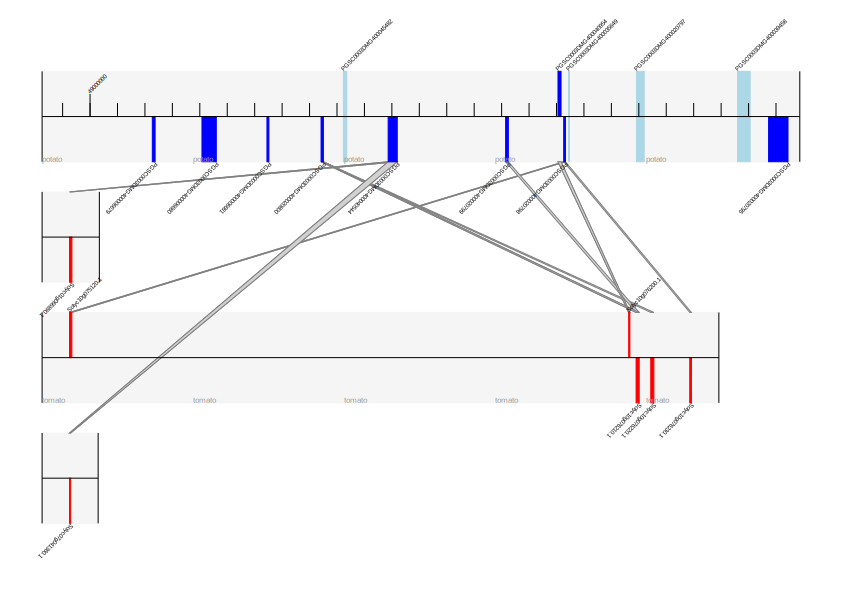

In [7]:
genesPdiagram = search.diagram_crosslinks("potato", "tomato", intervalP, genesP)
tmpFilename = "potato_"+pg1+"-"+pg2+".svg"
genesPdiagram.write(tmpFilename, "svg")
SVG(tmpFilename)

## Tomato
### Find interval
Find locations for genes, and compute interval

In [8]:
tg1 = "Solyc10g075170.1"
tg2 = "Solyc10g076240.1"
intervalT = search.compute_interval(tg1, tg2)

,location
gene_id,
Solyc10g075170.1,chromosome 10:58891402-58895882
Solyc10g076240.1,chromosome 10:59082990-59084119


### Find genes and orthologs
Find genes and orthologs for interval

In [9]:
genesT = search.interval_genes(intervalT)
aggregations = {"ensembl_gene_id" : ["nunique"], "ortholog_gene_id" : ["nunique"]}
display(genesT.groupby(["gene_id"]).agg(aggregations))

,ensembl_gene_id,ortholog_gene_id
,nunique,nunique
gene_id,,
Solyc10g076170.1,0,0
Solyc10g076180.1,1,0
Solyc10g076190.1,1,1
Solyc10g076200.1,1,2
Solyc10g076210.1,1,2
Solyc10g076220.1,1,2
Solyc10g076230.1,1,1


### Create diagram
Create a diagram for the genes found in the interval

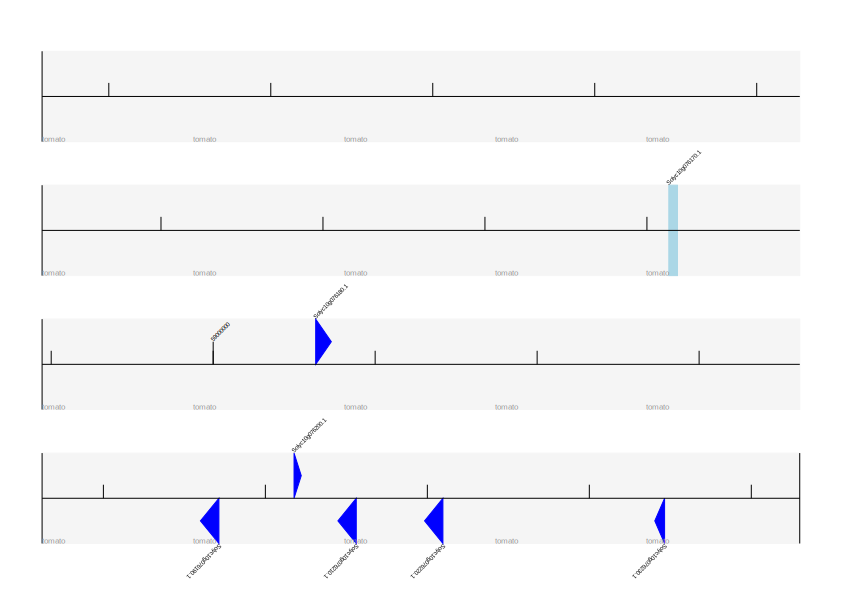

In [10]:
genesTdiagram = search.diagram_genes("tomato", intervalT, genesT)
tmpFilename = "tomato_"+pg1+"-"+pg2+".svg"
genesTdiagram.write(tmpFilename, "svg")
SVG(tmpFilename)

### List orthologs
List orthologs for the genes found in the interval

In [11]:
display(genesT[["location","ensembl_gene_id","ortholog_gene_id","ortholog_location"]])

,location,ensembl_gene_id,ortholog_gene_id,ortholog_location
gene_id,,,,
Solyc10g076170.1,chromosome 10:58981351-58981887,None,None,None
Solyc10g076180.1,chromosome 10:59006329-59007294,Solyc10g076180.1,None,None
Solyc10g076190.1,chromosome 10:59045991-59047132,Solyc10g076190.1,PGSC0003DMG400011948,chromosome 00:22142391-22143721:1
Solyc10g076190.1,chromosome 10:59045991-59047132,Solyc10g076190.1,None,None
Solyc10g076200.1,chromosome 10:59051770-59052216,Solyc10g076200.1,PGSC0003DMG400040954,chromosome 10:49170543-49171657:1
Solyc10g076200.1,chromosome 10:59051770-59052216,Solyc10g076200.1,PGSC0003DMG400011955,chromosome 00:22145065-22146428:-1
Solyc10g076200.1,chromosome 10:59051770-59052216,Solyc10g076200.1,None,None
Solyc10g076210.1,chromosome 10:59054478-59055612,Solyc10g076210.1,PGSC0003DMG400020800,chromosome 10:49084193-49085040:-1
Solyc10g076210.1,chromosome 10:59054478-59055612,Solyc10g076210.1,PGSC0003DMG400020799,chromosome 10:49151461-49152451:-1


### Chromosomes for orthologs
Chromosomes containing the found orthologs

In [12]:
aggregations = {"ortholog_begin_pos" : ["min","max"], "ortholog_end_pos" : ["min","max"]}
display(genesT.groupby(["ortholog_begin_ref"]).agg(aggregations))

ortholog_begin_pos  \
                                                                  min   
ortholog_begin_ref                                                      
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...         22142391.0   
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...         49085040.0   

                                                                \
                                                           max   
ortholog_begin_ref                                               
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...  22146428.0   
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...  49173264.0   

                                                   ortholog_end_pos  \
                                                                min   
ortholog_begin_ref                                                    
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...       22143721.0   
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...       49084193.0   

                                                                
                                                           max  
ortholog_begin_ref                                              
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...  22145065.0  
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...  49172630.0

### Diagram crosslinks
Create a diagram with crosslinks between found genes and orthologs

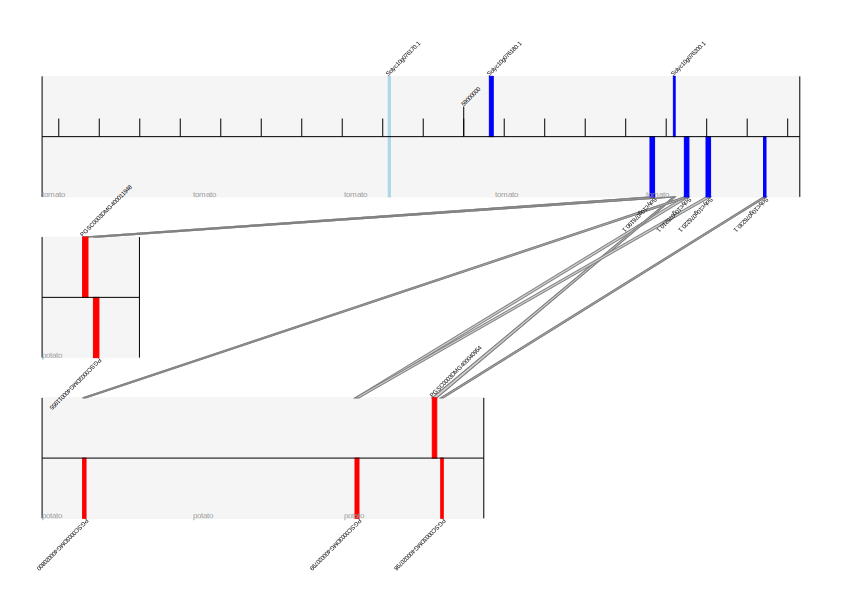

In [13]:
genesTdiagram = search.diagram_crosslinks("tomato", "potato", intervalT, genesT)
tmpFilename = "tomato_"+tg1+"-"+tg2+".svg"
genesTdiagram.write(tmpFilename, "svg")
SVG(tmpFilename)

# Annotations
Genes, orthologs for potato and tomato and annotations

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Potato

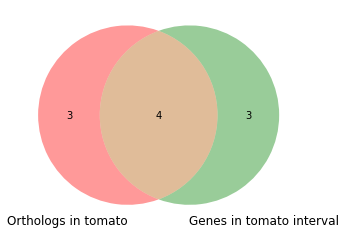

In [15]:
setp1 = genesP["ortholog_gene_id"].dropna().unique()
setp2 = genesT.index.unique()
setp3 = setp2 & setp1
setp1 = list(set(setp1)-set(setp3))
setp2 = list(set(setp2)-set(setp3))
venn2(subsets = (len(setp1), len(setp2), len(setp3)), set_labels = ("Orthologs in tomato", "Genes in tomato interval"))
plt.show()


## Not in tomato interval

In [16]:
print(*setp1, sep = "\n")

Solyc01g066890.1
Solyc07g041360.1
Solyc10g075120.1


In [17]:
termp1 = search.gene_annotations(setp1)["term"].dropna().unique()
print(*termp1, sep = "\n")

heme binding
peroxidase activity
response to oxidative stress


## Orthologs potato in tomato interval

In [18]:
print(*setp3, sep = "\n")

Solyc10g076200.1
Solyc10g076210.1
Solyc10g076220.1
Solyc10g076230.1


In [19]:
termp3 = search.gene_annotations(setp3)["term"].dropna().unique()
print(*termp3, sep = "\n")

heme binding
hydrogen peroxide catabolic process
peroxidase activity
extracellular region
lipid transport
response to oxidative stress
lipid binding
metal ion binding


## Only in tomato interval

In [20]:
print(*setp2, sep = "\n")

Solyc10g076180.1
Solyc10g076170.1
Solyc10g076190.1


In [21]:
termp2 = search.gene_annotations(setp2)["term"].dropna().unique()
print(*termp2, sep = "\n")

heme binding
hydrogen peroxide catabolic process
DNA binding
peroxidase activity
extracellular region
response to oxidative stress
negative regulation of transcription, DNA-templated
metal ion binding


# Tomato

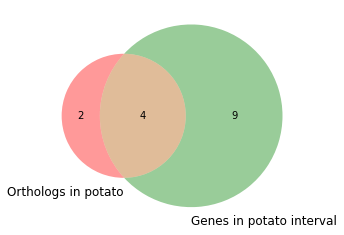

In [22]:
sett1 = genesT["ortholog_gene_id"].dropna().unique()
sett2 = genesP.index.unique()
sett3 = sett2 & sett1
sett1 = list(set(sett1)-set(sett3))
sett2 = list(set(sett2)-set(sett3))
venn2(subsets = (len(sett1), len(sett2), len(sett3)), set_labels = ("Orthologs in potato", "Genes in potato interval"))
plt.show()

## Not in potato interval

In [23]:
#genes
print(*sett1, sep = "\n")

PGSC0003DMG400011955
PGSC0003DMG400011948


In [24]:
#annotations
termt1 = search.gene_annotations(sett1)["term"].dropna().unique()
print(*termt1, sep = "\n")

heme binding
hydrogen peroxide catabolic process
peroxidase activity
extracellular region
lipid transport
response to oxidative stress
lipid binding
metal ion binding


## Orthologs tomato in potato interval

In [25]:
#genes
print(*sett3, sep = "\n")

PGSC0003DMG400020800
PGSC0003DMG400020799
PGSC0003DMG400040954
PGSC0003DMG400020798


In [26]:
#annotations
termt3 = search.gene_annotations(sett3)["term"].dropna().unique()
print(*termt3, sep = "\n")

heme binding
hydrogen peroxide catabolic process
peroxidase activity
lipid transport
response to oxidative stress
lipid binding
metal ion binding


## Only in potato interval

In [27]:
#genes
print(*sett2, sep = "\n")

PGSC0003DMG400039458
PGSC0003DMG400020795
PGSC0003DMG400020797
PGSC0003DMG400035649
PGSC0003DMG400040544
PGSC0003DMG400006680
PGSC0003DMG400006679
PGSC0003DMG400045482
PGSC0003DMG400006681


In [28]:
#annotations
termt2 = search.gene_annotations(sett2)["term"].dropna().unique()
print(*termt2, sep = "\n")

heme binding
hydrogen peroxide catabolic process
peroxidase activity
response to oxidative stress
metal ion binding
